### 1. Importing data, packages and understand data

In [1]:
import collections
import pandas as pd
import string
from sklearn.preprocessing import MinMaxScaler
from nltk.stem.lancaster import LancasterStemmer

%matplotlib inline

pll_0 = pd.read_excel("PLL schedule.xlsx", sheet_name='PLL Masterlist', header = 3)

# Filter on categories
pll = pll_0[pll_0['Categories'] == 'Award/Contract']

pll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 11 columns):
Owning Item                48 non-null object
Package                    48 non-null object
Categories OLD             48 non-null object
Categories                 48 non-null object
Lesson Description         48 non-null object
Lesson Description Mod0    48 non-null object
Lesson Description Mod     48 non-null object
Cause                      37 non-null object
Impact / Consequences      45 non-null object
Action Title               48 non-null object
Impact Level               42 non-null float64
dtypes: float64(1), object(10)
memory usage: 2.6+ KB


In [2]:
pll_0['Categories'].value_counts()

Engineering                       601
Construction                      362
Project Management                232
Procurement                       147
HSSE                              124
QAQC                               91
Award/Contract                     48
Precommissioning/Commissioning     43
Document Management                42
Interface                          36
Name: Categories, dtype: int64

In [3]:
pll['Categories'].value_counts()

Award/Contract    48
Name: Categories, dtype: int64

### 2. Tokenizing the titles

In [4]:
tokenized_titles = []
for title in pll['Lesson Description Mod']:
    token = title.split()
    tokenized_titles.append(token)


# Clean punctuations in the data
punctuation = [",", ":", ";", ".", "'", '"', "’", "?", "/", "-", "+", "&", "(", ")"]
clean_tokenized = []

# Call stemming algorithm 
stemmer = LancasterStemmer()

# Start tokenize and stem the data
for title in tokenized_titles:
    tokens = []
    for token in title:
        token = token.lower().strip()
        for punc in punctuation:
            token = token.replace(punc,'')
        token_stem = stemmer.stem(token)     
        tokens.append(token_stem)
        
    clean_tokenized.append(tokens)

In [5]:
clean_tokenized[0:5]

[['improv',
  'of',
  'coordin',
  'and',
  'monit',
  'of',
  'contract',
  'conform',
  'contract',
  'conform',
  'post',
  'award'],
 ['a',
  'lot',
  'of',
  'tim',
  'contract',
  'upheld',
  'licens',
  'requir',
  '',
  'spec',
  'that',
  'contradict',
  'own',
  'requir',
  'without',
  'first',
  'inform',
  'thu',
  'obtain',
  'own',
  'approv'],
 ['argu',
  'on',
  'detail',
  'scop',
  'dur',
  'execut',
  'ie',
  'chang',
  'ord',
  '',
  'trs'],
 ['award',
  'of',
  'loc',
  'auth',
  'approv',
  'and',
  'sit',
  'permit',
  'contract',
  'in',
  'tim',
  'to',
  'start',
  'sit',
  'work'],
 ['est',
  'docu',
  'man',
  'system',
  'day',
  '1',
  '',
  'contract',
  'fil',
  'and',
  'maint',
  'method']]

### 3. Assembling a matrix of unique words

In [6]:
import numpy as np
unique_tokens = []
single_tokens = []

for title in clean_tokenized:
    for token in title:
        if token not in single_tokens:
            single_tokens.append(token)
        elif token in single_tokens and token not in unique_tokens:
            unique_tokens.append(token)

print(len(single_tokens))
print(len(unique_tokens))

# Create a dataframe of unique tokens
counts = pd.DataFrame(0, index=np.arange(len(clean_tokenized)), columns=unique_tokens)

253
86


### 4. Counting token occurrences

In [7]:
for row_idx, title in enumerate(clean_tokenized):
    for token in title:
        if token in unique_tokens:
            col_idx = unique_tokens.index(token)
            counts.iloc[row_idx,col_idx] += 1

### 5. Removing columns to increase accuracy

In [8]:
word_counts = counts.sum()
print(word_counts.sort_values(ascending = False))

# Remove word counts more than 3 and less than 50 to improve accuracy
counts = counts.loc[:,(word_counts >= 3) & (word_counts <= 50)]

print(counts.head())
print(counts.shape)

contract       41
of             22
the            18
for            16
and            16
to             16
in             14
requir         13
subcontract    11
by             10
not             9
                8
own             8
approv          6
work            6
issu            6
chang           6
award           6
man             5
from            5
docu            5
on              5
process         5
del             4
bid             4
ins             4
spec            4
project         4
tim             4
or              4
               ..
construct       2
mobl            2
cyc             2
join            2
provid          2
vend            2
som             2
without         2
short           2
rel             2
engin           2
party           2
3rd             2
oblig           2
dat             2
claim           2
rapid           2
lat             2
al              2
fulfil          2
high            2
mileston        2
progress        2
condit          2
inform    

In [9]:
word_counts_row = counts.sum(axis = 1)
word_counts_row[word_counts_row>5].sort_values(ascending = False)

21    18
22    15
17    13
47    13
1     11
3     11
5     11
10    11
12    11
45    11
19    11
6     10
36    10
43     9
44     9
0      9
35     9
34     9
30     8
13     8
9      8
8      8
37     8
4      7
42     7
33     7
11     7
41     6
40     6
28     6
39     6
46     6
15     6
18     6
dtype: int64

### 6. Modify columns for better accuracy

In [10]:
counts_cols = counts.columns.tolist()

new_col = []
for col in counts_cols:
    if len(col) > 2:
        new_col.append(col)

counts = counts[new_col]
#counts.drop(columns = ['best','practice'],axis = 1, inplace = True)
word_counts = counts.sum()
print(word_counts.sort_values(ascending = False))

contract       41
the            18
and            16
for            16
requir         13
subcontract    11
not             9
own             8
issu            6
award           6
approv          6
work            6
chang           6
process         5
docu            5
man             5
from            5
tim             4
ord             4
ins             4
spec            4
bid             4
del             4
project         4
with            3
pay             3
conform         3
itb             3
due             3
submit          3
delay           3
system          3
includ          3
sit             3
est             3
propos          3
execut          3
coordin         3
agr             3
did             3
review          3
dtype: int64


### 7. Convert data to Boolean / Binary for better algorithm detection

In [11]:
counts_binary = counts.astype(bool).astype(int)
counts_binary.sum().sort_values(ascending=False)

contract       30
the            15
and            14
for            14
requir         10
not             9
subcontract     9
own             7
award           6
approv          6
issu            5
process         5
work            5
man             5
docu            5
ord             4
tim             4
project         4
ins             4
from            4
chang           4
spec            4
del             4
with            3
due             3
submit          3
delay           3
pay             3
est             3
agr             3
includ          3
execut          3
propos          3
bid             3
coordin         3
did             3
sit             2
system          2
itb             2
conform         2
review          2
dtype: int64

### 8. Calculate Similarities

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A_sparse = sparse.csr_matrix(counts_binary)
similarities = cosine_similarity(A_sparse)
print('pairwise dense output:\n {}\n'.format(similarities))

#also can output sparse matrices
similarities_sparse = cosine_similarity(A_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(similarities_sparse))

pairwise dense output:
 [[1.         0.18257419 0.         ... 0.36514837 0.4472136  0.31622777]
 [0.18257419 1.         0.         ... 0.33333333 0.20412415 0.14433757]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.36514837 0.33333333 0.         ... 1.         0.40824829 0.4330127 ]
 [0.4472136  0.20412415 0.         ... 0.40824829 1.         0.53033009]
 [0.31622777 0.14433757 0.         ... 0.4330127  0.53033009 1.        ]]

pairwise sparse output:
   (0, 40)	0.18257418583505539
  (0, 15)	0.18257418583505539
  (0, 6)	0.15811388300841894
  (0, 5)	0.1690308509457033
  (0, 41)	0.25819888974716115
  (0, 31)	0.4472135954999579
  (0, 7)	0.3162277660168379
  (0, 47)	0.3162277660168379
  (0, 46)	0.4472135954999579
  (0, 45)	0.36514837167011077
  (0, 44)	0.22360679774997896
  (0, 43)	0.25819888974716115
  (0, 42)	0.18257418583505539
  (0, 37)	0.19999999999999998
  (0, 35)	0.18257418583505539
  (0, 34)	0.18257418583505539
  (0, 30)	0.18257418583505539
  (0

### 9. Convert Correlation Matrix Into Pandas Dataframe 

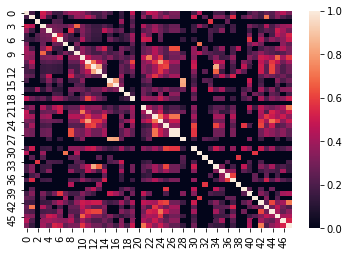

In [13]:
corrs_df = pd.DataFrame(similarities)

import seaborn as sns

# Plot correlation heatmap
sns.heatmap(corrs_df)

### 10. Unstack correlation matrix dataframe into series and convert it back into dataframe

In [14]:
corrs_series = corrs_df.unstack()
corrs_sorted = corrs_series.sort_values(ascending = False)

# Filter out exact correlation (1.00) and more than 60% correlated
corrs_filtered = corrs_sorted[(corrs_sorted< 0.999) & (corrs_sorted>0.6)]
new_corrs = pd.DataFrame({'corr XY':corrs_filtered.index, 'corrs':corrs_filtered.values})

### 11. Clean the new correlation dataframe for sorting

In [15]:
index0 = new_corrs['corr XY']

parentheses = ['(',')',' ']

index1 = []
index2 = []

for index in index0:
    for punc in parentheses:
        index = str(index)
        index = index.replace(punc,'')
    corrXY = index.split(',')
    index1.append(corrXY[0])
    index2.append(corrXY[1])
    
print(index1[:5])
print(index2[:5])

new_corrs['corr X'] = index1
new_corrs['corr Y'] = index2

new_corrs.drop(columns = ['corr XY'],inplace=True)

new_corrs[['corr X','corr Y']] = new_corrs[['corr X','corr Y']].astype('int64')
new_corrs.info()
print(new_corrs.head(10))

new_corrs['corr X'].value_counts()

['28', '34', '15', '12', '12']
['15', '12', '28', '13', '34']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
corrs     58 non-null float64
corr X    58 non-null int64
corr Y    58 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.4 KB
      corrs  corr X  corr Y
0  0.833333      28      15
1  0.833333      34      12
2  0.833333      15      28
3  0.833333      12      13
4  0.833333      12      34
5  0.833333      13      12
6  0.816497      28      16
7  0.816497      16      28
8  0.816497      16      15
9  0.816497      15      16


12    5
44    4
25    4
13    3
24    3
42    3
34    3
11    3
23    3
15    2
16    2
10    2
47    2
27    2
28    2
8     2
26    2
9     1
7     1
3     1
22    1
19    1
21    1
45    1
30    1
31    1
43    1
1     1
Name: corr X, dtype: int64

### 12. Show results for top 5 most common PLL based on correlation value

In [16]:
top_corr_X = new_corrs['corr X'].value_counts()
top_five = top_corr_X.index[0:5]

i=1

for idx in top_five:
    print('No ', i, ':\n' )
    top_first = new_corrs[new_corrs['corr X'] == idx]
    print(top_first,'\n')
    print(idx , ':', pll.iloc[top_first['corr X'].iloc[0]]['Lesson Description'],'\n')
    for top in top_first['corr Y']:
        print(top , ':', pll.iloc[top]['Lesson Description'],'\n')
    print('\n')    
    i += 1


No  1 :

       corrs  corr X  corr Y
3   0.833333      12      13
4   0.833333      12      34
19  0.707107      12      11
48  0.612372      12      25
49  0.612372      12      44 

12 : CONTRACTOR did not fulfil all the Insurance requirement in the CONTRACT at the required period. 

13 : CONTRACTOR did not understand the principles of insurance in construction project. 

34 : CONTRACTOR did not fulfilled CONTRACT requirements on insurance deliverable on "All Risk" Physical Damage 

11 : Best Practice: Thorough check (by line item) on the contract clause / requirement by iPMT 

25 : CONTRACTOR is not familiar with PETRONAS requirement 

44 : Some of the VENDORs included in the Master VENDOR List as provided in CONTRACT are not updated. 



No  2 :

       corrs  corr X  corr Y
23  0.707107      44      24
42  0.612372      44      13
43  0.612372      44      42
45  0.612372      44      12 

44 : Some of the VENDORs included in the Master VENDOR List as provided in CONTRACT are not

### Findings

The goal here is to find the most common PLL for Award/Contract category. From this analysis we can conclude that in summary, Contractor does not fully understand contract requirements as the most common PLL for this category. This coincides with  issues happened during the Project. Although the some of the data are repeated (corr X correlates with corr Y and vice versa), it still does not interfere with our goal.

### 13a. Re-run analysis using original counts without converting to binary 

In [17]:
counts_scaled=((counts-counts.min())/(counts.max()-counts.min()))

B_sparse = sparse.csr_matrix(counts_scaled)
B_similarities = cosine_similarity(B_sparse)
print('pairwise dense output:\n {}\n'.format(B_similarities))

#also can output sparse matrices
B_similarities_sparse = cosine_similarity(B_sparse,dense_output=False)
print('pairwise sparse output:\n {}\n'.format(B_similarities_sparse))

B_corrs_df = pd.DataFrame(B_similarities)

B_corrs_series = B_corrs_df.unstack()
B_corrs_sorted = B_corrs_series.sort_values(ascending = False)

B_corrs_filtered = B_corrs_sorted[(B_corrs_sorted< 0.999) & (B_corrs_sorted>0.6)]
B_new_corrs = pd.DataFrame({'corr XY':B_corrs_filtered.index, 'corrs':B_corrs_filtered.values})

B_index0 = B_new_corrs['corr XY']

B_index1 = []
B_index2 = []

for index in B_index0:
    for punc in parentheses:
        index = str(index)
        index = index.replace(punc,'')
    corrXY = index.split(',')
    B_index1.append(corrXY[0])
    B_index2.append(corrXY[1])
    
#print(B_index1[:5])
#print(B_index2[:5])

B_new_corrs['corr X'] = B_index1
B_new_corrs['corr Y'] = B_index2

B_new_corrs.drop(columns = ['corr XY'],inplace=True)

B_new_corrs[['corr X','corr Y']] = B_new_corrs[['corr X','corr Y']].astype('int64')
B_new_corrs.info()
#print(B_new_corrs.head(10))

B_new_corrs.groupby(['corr X']).size().sort_values(ascending=False)

pairwise dense output:
 [[1.         0.05113936 0.         ... 0.25187949 0.1935571  0.16068617]
 [0.05113936 1.         0.         ... 0.16375861 0.03872015 0.0437165 ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.25187949 0.16375861 0.         ... 1.         0.29167491 0.24065097]
 [0.1935571  0.03872015 0.         ... 0.29167491 1.         0.34065781]
 [0.16068617 0.0437165  0.         ... 0.24065097 0.34065781 1.        ]]

pairwise sparse output:
   (0, 40)	0.07509392614826385
  (0, 15)	0.06131393394849659
  (0, 6)	0.0589926172810016
  (0, 5)	0.073740771601252
  (0, 41)	0.346843987809648
  (0, 31)	0.520265981714472
  (0, 7)	0.4653400405976888
  (0, 47)	0.16068616809494557
  (0, 46)	0.19355709889203543
  (0, 45)	0.25187949446546287
  (0, 44)	0.07232197088734792
  (0, 43)	0.17763528809052292
  (0, 42)	0.07007306736971038
  (0, 37)	0.12030075187969924
  (0, 35)	0.05536232752546558
  (0, 34)	0.10672122701835324
  (0, 30)	0.06835110722882107
  (0, 2

corr X
12    3
31    3
16    2
34    2
28    2
24    2
9     2
11    2
15    2
13    2
7     1
10    1
42    1
41    1
22    1
23    1
25    1
3     1
dtype: int64

### 13b. Show results for top 5 most common based on correlation value (original counts without converting to binary)

In [18]:
B_top_corr_X = B_new_corrs['corr X'].value_counts()
B_top_five = B_top_corr_X.index[0:5]

i=1

for idx in B_top_five:
    print('No ', i, ':\n' )
    top_first = B_new_corrs[B_new_corrs['corr X'] == idx]
    print(top_first,'\n')
    print(idx , ':', pll.iloc[top_first['corr X'].iloc[0]]['Lesson Description'],'\n')
    for top in top_first['corr Y']:
        print(top , ':', pll.iloc[top]['Lesson Description'],'\n')
    print('\n')    
    i += 1


No  1 :

       corrs  corr X  corr Y
1   0.894427      31       7
24  0.666667      31      41
28  0.618853      31       9 

31 : Withdrawal of SI letter award 

7 : Best Practice: Evaluate earliest possible Subcontract awards. 

41 : Extremely low bid award price compared to OWNER's estimate / next lowest bidders 

9 : Best Practice: Site Security Contract to be awarded in time for TCF operation. 



No  2 :

       corrs  corr X  corr Y
11  0.780220      12      34
15  0.741584      12      13
26  0.658311      12      11 

12 : CONTRACTOR did not fulfil all the Insurance requirement in the CONTRACT at the required period. 

34 : CONTRACTOR did not fulfilled CONTRACT requirements on insurance deliverable on "All Risk" Physical Damage 

13 : CONTRACTOR did not understand the principles of insurance in construction project. 

11 : Best Practice: Thorough check (by line item) on the contract clause / requirement by iPMT 



No  3 :

      corrs  corr X  corr Y
4  0.849837      16     

In [19]:
counts_scaled

,contract,conform,requir,own,award,approv,and,tim,sit,est,...,includ,from,pay,system,delay,submit,due,itb,with,review
0,0.666667,1.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.333333,0.0,0.0,0.0,1.0,1.0,0.5,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
6,0.000000,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.333333,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
counts_binary

,contract,conform,requir,own,award,approv,and,tim,sit,est,...,includ,from,pay,system,delay,submit,due,itb,with,review
0,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
